# Binary classification single feature

Classification using "raw" python or libraries (SciKit Learn, Tensorflow).

The classification is first on a single boundary defined by a continuous univariate function and added white noise

In [1]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics as skMetrics
from sklearn.linear_model import LogisticRegression as SkLinReg
# Local file to fix some issue in the heat map of the confusion matrix
from heat_map import plot_heat_map
import scipy as sy
import pandas

## Model

We want to measure or predict a value y to be above a threshold. E.g.: y is a temperature.

We know a feature x, y is related to x through a quadratic function we do not a priori know and some unknown

This unknown is modeled by a Gaussian noise

In [2]:
# Single feature, Gaussian noise
nFeatures = 1
def generateBatch(N):
    #
    xMin = 0
    xMax = 1
    b = 0.2
    std = 0.2
    # Threshold from 0 to 1
    threshold = 1
    #
    x = random.uniform(xMin, xMax, N)
    # 4th degree relation between y and x
    yClean = 2*(x**4 + (x-0.3)**3 + b)
    labels = yClean + random.normal(0, std, N) > threshold
    return (x, yClean, labels)

The values of X are uniformly distributed and independent

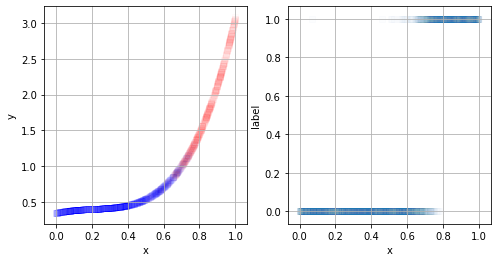

In [3]:
N = 2000
# x and y have 1 dim in R, label has 1 dim in B
xTrain, yCleanTrain, labelTrain = generateBatch(N)

colors = ['blue','red']

fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(xTrain, yCleanTrain, c=labelTrain, cmap=pltcolors.ListedColormap(colors), marker=',', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(1,2,2)
plt.scatter(xTrain, labelTrain, marker=',', alpha=0.01)
plt.xlabel('x')
plt.ylabel('label')
plt.grid()

Bernouilli parameter of the distribution: 0.3075


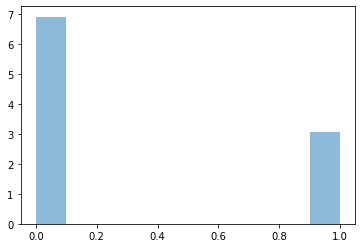

In [4]:
count, bins, ignored = plt.hist(labelTrain*1.0, 10, density=True, alpha=0.5)
p = np.mean(labelTrain)
print('Bernouilli parameter of the distribution:', p)

Note: The two values are not a priori equi probable. In theory, ressampling of the training values would be required to balance the a priori distribution.

In [5]:
xTest, yTest, labelTest = generateBatch(N)

### Logistic and log of Logistic functions

In [6]:
def logistic(X):
    return (1+(np.exp(-(X))))**-1

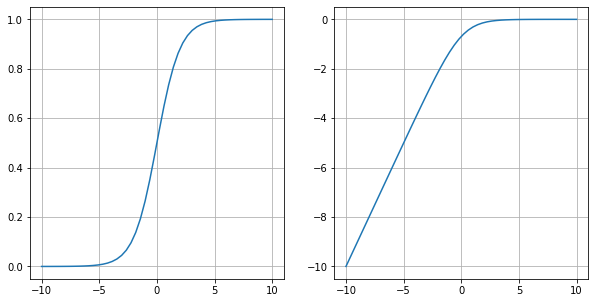

In [7]:
xx = np.linspace(-10, 10)
xlogistic = logistic(xx)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(xx, xlogistic)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(xx, np.log(xlogistic))
plt.grid()

# Logistic regression

\begin{align}
y \in \left\{ 0, 1 \right\}
\end{align}

\begin{align}
p(Y=1 \mid x) & = \frac{1}{1+e^{-f_\theta(x)}} \\
f_\theta(x) & = b + w x \\
\theta &= \{b, w\}
\end{align}

We are looking for the value of w that maximize the likelyhood:
\begin{align}
\hat{\theta} & = \max_{\theta}{\prod_{i=0}^N{p(y_i \mid  x_i, w)}} \\
& = \max_{\theta}{\sum_{i=0}^N{log \bigl(p(y_i \mid x_i, w)\bigr)} } \\
& = \max_{\theta}{\sum_{i=0}^N{log \biggl(\bigl(\frac{1}{1+e^{-f_\theta(x_i)}}\bigr)^{y_i}\bigl(1-\frac{1}{1+e^{-f_\theta(x_i)}}\bigr)^{1-y_i}\biggr)} } \\
& = \max_{\theta}{\sum_{i=0}^N{log \biggl(y_i * \bigl(\frac{1}{1+e^{-f_\theta(x_i)}}\bigr) + \bigl(1-y_i\bigr) * \bigl(1-\frac{1}{1+e^{-f_\theta(x_I)}}\bigr) \biggr)} } \\
\end{align}

Using the fact that $y_i$ is either 0 or 1

Reference:
- https://en.wikipedia.org/wiki/Logistic_regression


## Fitting of $b$ and then $w$


Suboptimal fitting:
- Taking some assumption on $w$ to fit $b$ as $\hat{b}$
- and then fitting $w$ with the $\hat{b}$ estimate

Estimate b = -1.3265306122448979


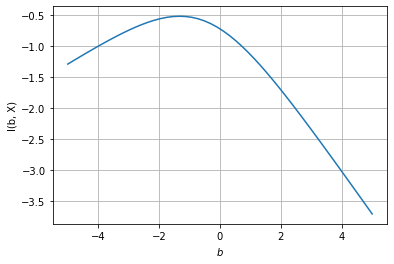

In [8]:
b = np.linspace(-5, 5)
w = 1
px = np.zeros(len(b))
for i in range(len(b)):
    fx = logistic(b[i] + w*xTrain)
    px[i] = 1/N * np.sum(np.log(labelTrain*fx + (1-labelTrain)*(1-fx)))
plt.plot(b, px);
plt.xlabel('$b$')
plt.ylabel('l(b, X)')
plt.grid()
bHat = b[np.argmax(px)]
print('Estimate b =', bHat) 

Estimate w = 2.0408163265306136


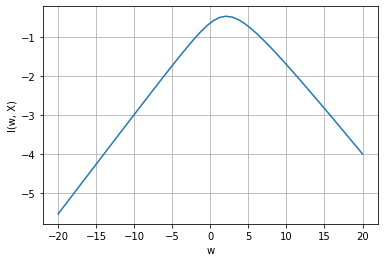

In [9]:
w = np.linspace(-20, 20)
px = np.zeros(len(w))
for i in range(len(w)):
    fx = logistic(bHat + w[i]*xTrain)
    px[i] = 1/N * np.sum(np.log(labelTrain*fx + (1-labelTrain)*(1-fx)))
plt.plot(w, px);
plt.xlabel('w')
plt.ylabel('l(w, X)')
plt.grid()
wHat = w[np.argmax(px)]
print('Estimate w =', wHat)

In [10]:
pXTest0 = logistic(bHat + wHat * xTest)
labelEst0 = pXTest0 > 0.5

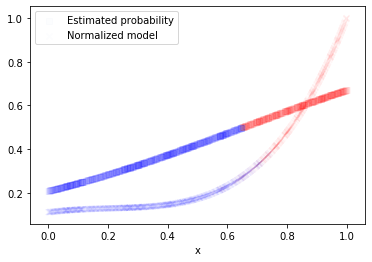

In [11]:
plt.scatter(xTest, pXTest0, c=labelEst0, cmap=pltcolors.ListedColormap(colors), marker=',', alpha=0.01);
plt.scatter(xTest, yTest/np.max(yTest), c = labelTest, cmap=pltcolors.ListedColormap(colors), marker='x', alpha=0.01);
plt.xlabel('x')
plt.legend(('Estimated probability', 'Normalized model'));

Bernouilli parameter = 0.3445


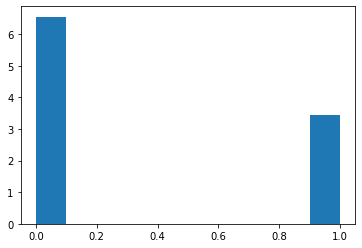

In [12]:
plt.hist(labelEst0*1.0, 10, density=True)
print('Bernouilli parameter =', np.mean(labelEst0))

In [13]:
accuracy0 = np.sum(labelTest == labelEst0)/N
print('Accuracy =', accuracy0)

Accuracy = 0.936


### Precision 
$p(y = 1 \mid \hat{y} = 1)$

In [14]:
print('Precision =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelEst0))

Precision = 0.8606676342525399


### Recall
$p(\hat{y} = 1 \mid y = 1)$

In [15]:
print('Recall =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelTest))

Recall = 0.9488


### Confusion matrix

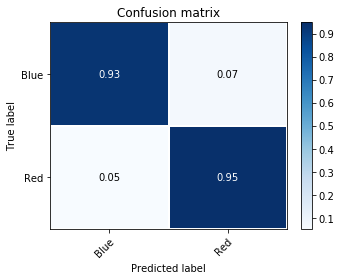

In [16]:
plot_heat_map(skMetrics.confusion_matrix(labelTest, labelEst0), np.array(['Blue', 'Red']), normalize=True);

In [17]:
print(skMetrics.classification_report(labelTest, labelEst0))

              precision    recall  f1-score   support

       False       0.98      0.93      0.95      1375
        True       0.86      0.95      0.90       625

    accuracy                           0.94      2000
   macro avg       0.92      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000



# SciKit Learn

References:
- SciKit documentation
- https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [18]:
model1 = SkLinReg(solver='lbfgs')
model1.fit(xTrain.reshape(-1,1), labelTrain)
model1.coef_

array([[13.22525574]])

In [19]:
labelEst1 = model1.predict(xTest.reshape(-1,1))
print('Accuracy =',model1.score(xTest.reshape(-1,1), labelTest))

Accuracy = 0.95


Bernouilli parameter = 0.3095


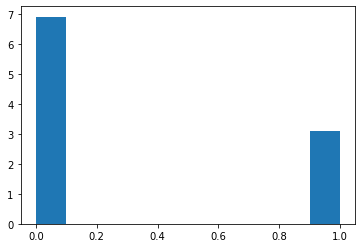

In [20]:
plt.hist(labelEst1*1.0, 10, density=True)
print('Bernouilli parameter =', np.mean(labelEst1))

### Confusion matrix (plot)

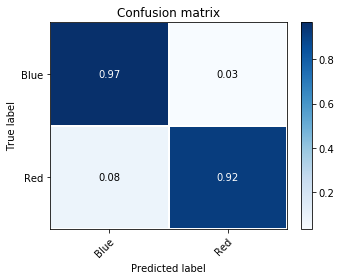

In [21]:
plot_heat_map(skMetrics.confusion_matrix(labelTest, labelEst1), np.array(['Blue', 'Red']), normalize=True);

### Classification report

In [22]:
print(skMetrics.classification_report(labelTest, labelEst1))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96      1375
        True       0.92      0.92      0.92       625

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



References :
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.get_params

### ROC curve

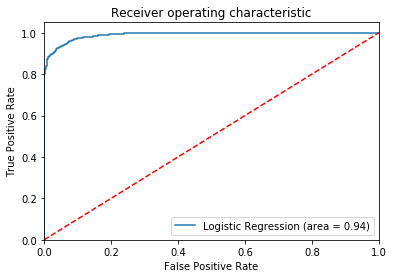

In [23]:
logit_roc_auc = skMetrics.roc_auc_score(labelTest, labelEst1)
fpr, tpr, thresholds = skMetrics.roc_curve(labelTest, model1.predict_proba(xTest.reshape(-1,1))[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

# Using TensorFlow 2.0

In [24]:
import tensorflow as tf

In [25]:
# Labels as floats {0., 1.}
labelTrainF = np.multiply(labelTrain, 1.0)
labelTrainF.dtype, labelTrainF.shape

(dtype('float64'), (2000,))

In [26]:
# (Mini) Batch size
nBatch = 100
# Number of batches per Epoch
nBatchPerEpoch =20
# Safe guard to stop on number of epochs
nEpochMax = 1000

In [34]:
# Simple custom layer exposing the linear regression model
class MyLogisticRegressionLayer(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(MyLogisticRegressionLayer, self).__init__(*args, **kwargs)
    
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=input_shape[0],
            dtype=self.dtype,
            initializer=tf.keras.initializers.ones(),
            #regularizer=tf.keras.regularizers.l2(0.02),
            trainable=True)
        self.b = self.add_weight(
            shape=1,
            dtype=self.dtype,
            initializer=tf.keras.initializers.ones(),
            #regularizer=tf.keras.regularizers.l2(0.02),
            trainable=True)

    @tf.function
    def call(self, x, training=None):
        return tf.math.sigmoid(tf.math.add(tf.math.multiply(x, self.w), self.b))

In [35]:
# Using TensorFlow 2.0 style of metrics to implement accuracy
class MyBinaryAccuracy(tf.keras.metrics.Metric):

    def __init__(self, name='my_accuracy', **kwargs):
        super(MyBinaryAccuracy, self).__init__(name=name, **kwargs)
        self.accuracySum = self.add_weight(name='accuracySum', 
                                           initializer='zeros')
        self.accuracyCount = self.add_weight(name='accuracyCount', 
                                             initializer='zeros')

    def update_state(self, labels, yEst):
        labels = tf.cast(labels, tf.bool)
        labelEst = tf.greater(yEst, 0.5)

        values = tf.cast(tf.equal(labels, labelEst), self.dtype)
        self.accuracySum.assign_add(tf.reduce_sum(values))
        self.accuracyCount.assign_add(values.get_shape()[0])

    def result(self):
        return self.accuracySum / self.accuracyCount

In [38]:
# Model 1, instantiate the custom layer
model1 = tf.keras.Sequential([MyLogisticRegressionLayer(input_shape=[nFeatures], dtype="float64")])

# Stochastic Gradient Descent Optimizer
optim1 = tf.keras.optimizers.SGD(0.01)

# Perform a train step on a mini-batch
#  This function's code is rewritten by TensorFlow 2.0 and shall be compiled at every execution of the optimizer
@tf.function
def trainStep1(x, labels):
    with tf.GradientTape() as tape:
        predictions = model1(x, training=True)
        loss = -tf.reduce_sum(tf.math.log((labels * predictions) + ((1 - labels) * (1 - predictions))))
        #loss = tf.keras.losses.categorical_crossentropy(labels, predictions)
        
        gradients = tape.gradient(loss, model1.trainable_variables)
        optim1.apply_gradients(zip(gradients, model1.trainable_variables))
        return loss, predictions
    
# Initialize values and loop on epochs and mini batch
epoch = 0
cost_epoch = 1
histo = []
accuracy = MyBinaryAccuracy()
while epoch < nEpochMax:
    cost_cumul = 0
    accuracy.reset_states()
    for b in range(0, nBatchPerEpoch*nBatch, nBatch):  
        cost, predictions = trainStep1(xTrain[b : b + nBatch], labelTrainF[b : b + nBatch])
        cost_cumul += cost
        accuracy.update_state(labelTrainF[b : b + nBatch], predictions)
        
    cost_epoch = cost_cumul / nBatchPerEpoch
    W = model1.get_weights()
    histo.append((cost_epoch.numpy(), accuracy.result().numpy(), W[1][0], W[0]))
    epoch += 1

print("Predicted model: {w:.3f} x + {b:.3f}, num epochs={c}".format(w=W[0], b=W[1][0], c=len(histo)))

# Save history as a Panda Data Frame
df = pandas.DataFrame(histo, columns = ('cost', 'accuracy', 'b', 'w0'))

Predicted model: 25.765 x + -17.684, num epochs=1000


SGD shows that there is not a single optimal value for b+w (intercept + slope) but a straight line  as shown on the graph below.
This is explained by the single feature: the decision boundary does not need to be a logistic curve, a single intercept point would be enough.

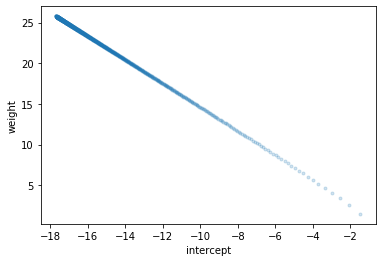

In [39]:
plt.scatter(df['b'], df['w0'], marker='.', alpha=0.2);
plt.xlabel('intercept')
plt.ylabel('weight');

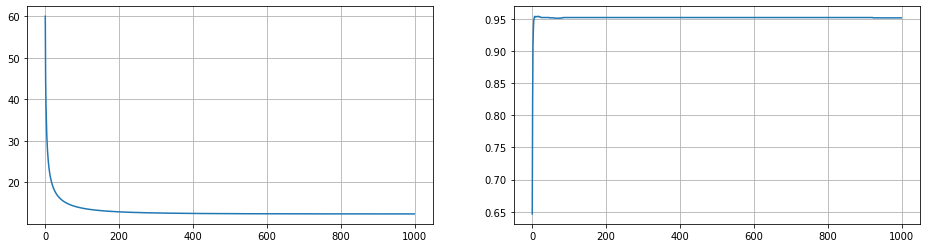

In [47]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
ax[0].plot(df['cost'])
ax[0].grid()
ax[1].plot(df['accuracy'])
ax[1].grid()

# Where to go from here ?

__More complex models__ with the 2 feature [binary classification](ClassificationContinuous2Features.html) ([Notebook](ClassificationContinuous2Features.ipynb)) or the [K Nearest Neighbors classifier](ClassificationContinuous2Features-KNN.html) ([Notebook](ClassificationContinuous2Features-KNN.ipynb))

__Compare with the single feature linear regression__ [using simple algorithms](../linear/LinearRegressionUnivariate.html) ([Notebook](LinearRegressionUnivariate.ipynb])), [or using Tensorflow](LinearRegressionUnivariate-TensorFlow.html) ([Notebook](LinearRegressionUnivariate-TensorFlow.ipynb))